<a href="https://colab.research.google.com/github/masags17/Python/blob/main/winequality_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Análisis Exploratorio de Datos ---
Resumen estadístico:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087

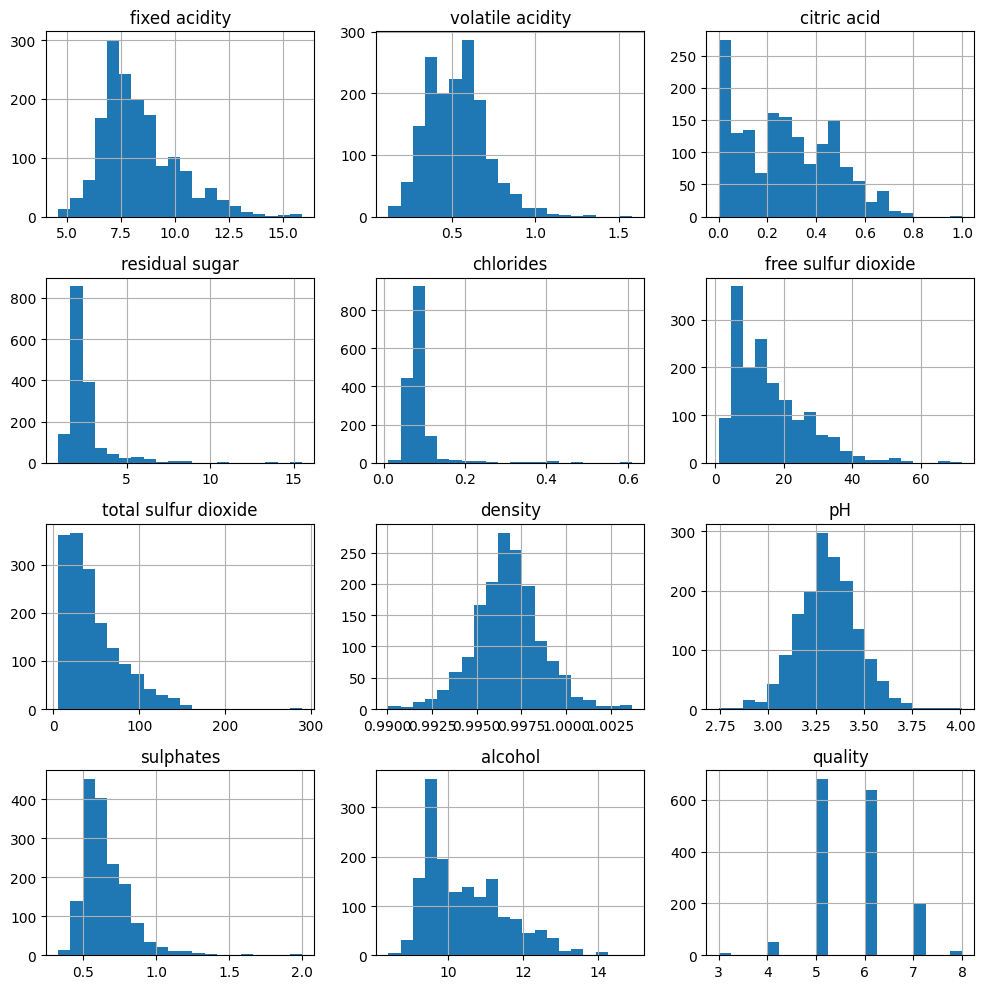


Valores faltantes:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
--- Preprocesamiento de Datos ---

Valores atípicos (3 desviaciones estándar desde la media):
fixed acidity: 12
volatile acidity: 10
citric acid: 1
residual sugar: 30
chlorides: 31
free sulfur dioxide: 22
total sulfur dioxide: 15
density: 18
pH: 8
sulphates: 27
alcohol: 8
quality: 10
Datos preprocesados:
[[-0.5524154   1.04904992 -1.38211381 -0.56568453 -0.25896965 -0.4313493
  -0.31122262  0.64312507  1.37177895 -0.63799966 -1.01376773]
 [-0.30909974  2.11525852 -1.38211381  0.24910391  0.82204318  1.09634295
   0.87490661  0.05374379 -0.82841034  0.30877743 -0.61729088]
 [-0.30909974  1.40445279 -1.17279394 -0.10009114  0.52722149  0.0051342
   

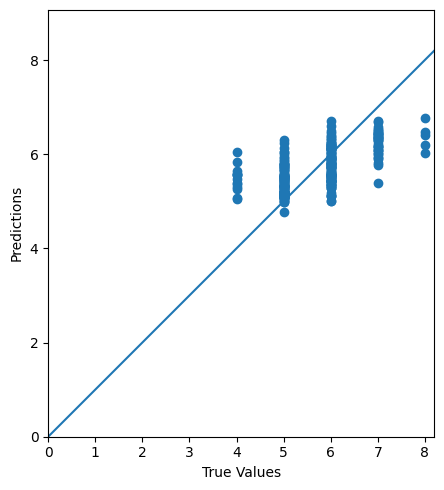

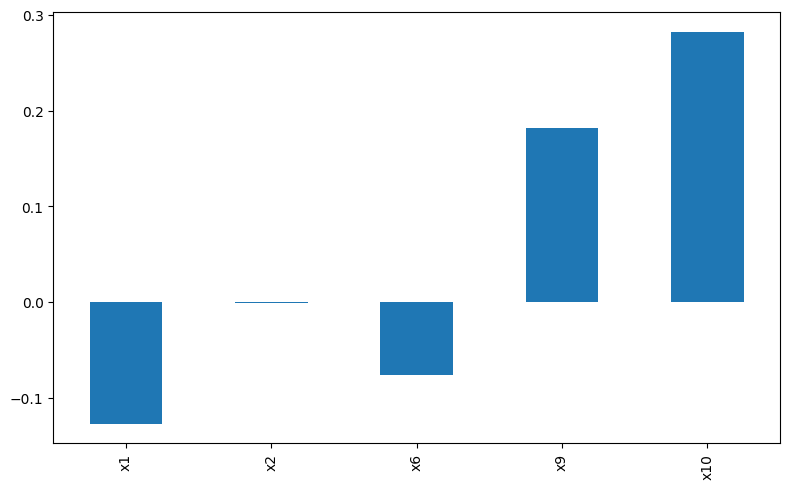

--- Interpretación y Análisis de Resultados ---
Las variables más importantes son:
x10    0.282377
x9     0.181430
x1     0.126805
dtype: float64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Dataset")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Regresión Lineal con winequality-red.csv
data = pd.read_csv('winequality-red.csv')

# 1. Análisis Exploratorio de Datos
print("--- Análisis Exploratorio de Datos ---")
print("Resumen estadístico:")
print(data.describe())

print("\nMatriz de correlación:")
print(data.corr())

data.hist(bins=20, figsize=(10,10))
plt.tight_layout()
plt.show()

# Verificar valores faltantes
print("\nValores faltantes:")
print(data.isnull().sum())

# 2. Preprocesamiento de Datos
print("--- Preprocesamiento de Datos ---")

# Eliminar filas con valores faltantes
data = data.dropna()

# Verificar valores atípicos
print("\nValores atípicos (3 desviaciones estándar desde la media):")
for col in data.columns:
    mean = data[col].mean()
    std = data[col].std()
    atipicos = data[(data[col] < mean - 3*std) | (data[col] > mean + 3*std)]
    print(f"{col}: {len(atipicos)}")

# Eliminar valores atípicos
for col in data.columns:
    mean = data[col].mean()
    std = data[col].std()
    data = data[(data[col] >= mean - 3*std) & (data[col] <= mean + 3*std)]

X = data.drop('quality', axis=1)
y = data['quality']
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Datos preprocesados:")
print(X[:5])

# 3. Selección de Características
print("--- Selección de Características ---")
selector = SelectKBest(f_regression, k=5)
X = selector.fit_transform(X, y)
print("Características seleccionadas:")
print(selector.get_feature_names_out())

# 4. División en Train y Test
print("--- División en Train y Test ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño de Train: {X_train.shape[0]}")
print(f"Tamaño de Test: {X_test.shape[0]}")

# 5. Entrenamiento del Modelo
print("--- Entrenamiento del Modelo ---")
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Modelo entrenado.")

# 6. Evaluación del Modelo
print("--- Evaluación del Modelo ---")
y_pred = reg.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"R^2: {r2_score(y_test, y_pred):.3f}")

# 7. Gráficas de Resultados
print("--- Gráficas de Resultados ---")
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.tight_layout()
plt.show()

coefs = pd.Series(reg.coef_, index=selector.get_feature_names_out())
coefs.plot.bar(figsize=(8,5))
plt.tight_layout()
plt.show()

# 8. Interpretación y Análisis de Resultados
print("--- Interpretación y Análisis de Resultados ---")
print("Las variables más importantes son:")
print(coefs.abs().nlargest(3))